In [1]:
%load_ext ipython_sparql_pandas

In [2]:
%%sparql http://query.wikidata.org/sparql -qs capitals
SELECT ?capitalLabel ?population ?coords WHERE {
    ?capital 
        wdt:P1376 [ # capital of :
            wdt:P463 wd:Q458 ; # member of: EU
        ];
        wdt:P625 ?coords . # coordinate location: ?coords
    
    # Using Wikidata-only label service
    SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
} ORDER BY DESC (?population)

<AxesSubplot:>

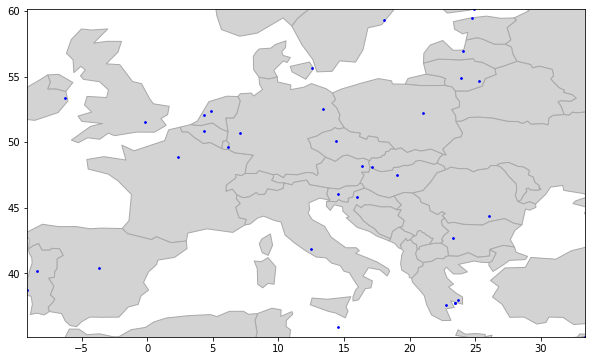

In [3]:
import geopandas as gpd # pip install geopandas

# GeoPandas User Guide: https://geopandas.org/docs/user_guide.html
countries = gpd.read_file( gpd.datasets.get_path("naturalearth_lowres") )

capitals = gpd.GeoDataFrame(capitals)
# Convert the coordinates from 'well-known-text' to geometry
capitals['geometry'] = gpd.GeoSeries.from_wkt(capitals['coords'])

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (10,7))

# Set the boundaries of the map
x1, y1, x2, y2 = capitals.total_bounds
ax.set_xlim(x1, x2)
ax.set_ylim(y1, y2)

# plot the background map
countries.plot(color='lightgrey', edgecolor='darkgrey', ax=ax)

# plot the capitals
capitals.plot(color='blue', ax=ax, markersize=3)

In [ ]:
### Assignment:
###   Make the markers bigger depending on the population of the capital
###   (but keep it readable!)
###   Tip: use the auto-complete functionality of http://query.wikidata.org

## Extra points: Why does Wikidata return that the UK is a member of the EU?